In [62]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import KFold, train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


In [63]:
tp_bound = 111994
predict_max_index = 185223

In [64]:
training_data_df = pd.read_csv('training_data.csv', index_col = [0])
predict_data_df = pd.read_csv('predict_data.csv', index_col = [0])
total_data_df = pd.concat([training_data_df, predict_data_df])
total_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Wears Glasses,Hair Color,Body Height [cm],Income
Instance,,,,,,,,,,,
1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,0,Blond,193,61031.94416
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,0,Black,186,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,1,Brown,170,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,1,Black,171,45993.75793
5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,0,Blond,188,38022.16217


In [65]:
total_data_df.drop('Wears Glasses', axis = 1, inplace = True)
total_data_df.drop('Hair Color', axis = 1, inplace = True)
total_data_df.drop('Body Height [cm]', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,Gender,Age,Country,Size of City,Profession,University Degree,Income
Instance,,,,,,,,
1,1997.0,0,41.0,Belarus,1239930,steel workers,Bachelor,61031.94416
2,1996.0,other,41.0,Singapore,1603504,safe event coordinator,Master,91001.32764
3,2018.0,other,28.0,Norway,1298017,receivables/payables analyst,PhD,157982.17670
4,2006.0,other,33.0,Cuba,751903,fleet assistant,No,45993.75793
5,2010.0,female,46.0,United Arab Emirates,95389,lead trainer,0,38022.16217


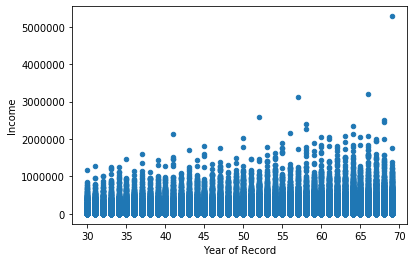

In [66]:

total_data_df['Year of Record'].fillna(2000, inplace = True)
total_data_df['Year of Record'] = total_data_df['Year of Record'].map(lambda year: year - 1950)

total_data_df[:tp_bound].plot.scatter(x='Year of Record', y = 'Income')

In [67]:
total_data_df['Gender'].fillna('unknown', inplace = True)
total_data_df['Gender'].replace('0', 'unknown', inplace = True)

total_data_df['Gender'].value_counts().sort_index()

female     44913
male       70968
other      44674
unknown    24668
Name: Gender, dtype: int64

In [68]:
gender_dummies = pd.get_dummies(total_data_df['Gender'], prefix = 'Gender')
total_data_df.drop('Gender', axis = 1, inplace = True)
total_data_df = total_data_df.join(gender_dummies)

total_data_df.head()

,Year of Record,Age,Country,Size of City,Profession,University Degree,Income,Gender_female,Gender_male,Gender_other,Gender_unknown
Instance,,,,,,,,,,,
1,47.0,41.0,Belarus,1239930,steel workers,Bachelor,61031.94416,0,0,0,1
2,46.0,41.0,Singapore,1603504,safe event coordinator,Master,91001.32764,0,0,1,0
3,68.0,28.0,Norway,1298017,receivables/payables analyst,PhD,157982.17670,0,0,1,0
4,56.0,33.0,Cuba,751903,fleet assistant,No,45993.75793,0,0,1,0
5,60.0,46.0,United Arab Emirates,95389,lead trainer,0,38022.16217,1,0,0,0


In [69]:
total_data_df['Country'].fillna('unknown', inplace = True)

dummies = pd.get_dummies(total_data_df['Country'], prefix = 'Country')
total_data_df.drop('Country', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)

total_data_df.head()

,Year of Record,Age,Size of City,Profession,University Degree,Income,Gender_female,Gender_male,Gender_other,Gender_unknown,...,Country_United Arab Emirates,Country_United Kingdom,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe
Instance,,,,,,,,,,,,,,,,,,,,,
1,47.0,41.0,1239930,steel workers,Bachelor,61031.94416,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,46.0,41.0,1603504,safe event coordinator,Master,91001.32764,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,28.0,1298017,receivables/payables analyst,PhD,157982.17670,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,56.0,33.0,751903,fleet assistant,No,45993.75793,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,60.0,46.0,95389,lead trainer,0,38022.16217,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [70]:
total_data_df['SoC_8e6_1'] = total_data_df['Size of City'].map(lambda soc: soc if soc < 8e6 else 0)
total_data_df['SoC_8e6_2'] = total_data_df['Size of City'].map(lambda soc: soc if soc > 8e6 else 0)


In [71]:
total_data_df.drop('Size of City', axis = 1, inplace = True)

total_data_df.head()

,Year of Record,Age,Profession,University Degree,Income,Gender_female,Gender_male,Gender_other,Gender_unknown,Country_Afghanistan,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela,Country_Vietnam,Country_Yemen,Country_Zambia,Country_Zimbabwe,SoC_8e6_1,SoC_8e6_2
Instance,,,,,,,,,,,,,,,,,,,,,
1,47.0,41.0,steel workers,Bachelor,61031.94416,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1239930,0
2,46.0,41.0,safe event coordinator,Master,91001.32764,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1603504,0
3,68.0,28.0,receivables/payables analyst,PhD,157982.17670,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1298017,0
4,56.0,33.0,fleet assistant,No,45993.75793,0,0,1,0,0,...,0,0,0,0,0,0,0,0,751903,0
5,60.0,46.0,lead trainer,0,38022.16217,1,0,0,0,0,...,0,0,0,0,0,0,0,0,95389,0


In [72]:
total_data_df['Age'].fillna(35, inplace=True)

total_data_df['Age'].value_counts().sort_index()

14.0     2229
15.0     4597
16.0     4453
17.0     4525
18.0     4435
19.0     4435
20.0     4472
21.0     4562
22.0     4459
23.0     4501
24.0     4407
25.0     4357
26.0     4469
27.0     4475
28.0     4270
29.0     4493
30.0     4282
31.0     4124
32.0     4332
33.0     4078
34.0     4247
35.0     4948
36.0     4033
37.0     4000
38.0     3874
39.0     3861
40.0     3783
41.0     3743
42.0     3592
43.0     3467
         ... 
86.0      134
87.0      114
88.0       78
89.0       77
90.0       77
91.0       72
92.0       60
93.0       42
94.0       47
95.0       29
96.0       24
97.0       25
98.0       14
99.0       26
100.0      22
101.0      17
102.0       9
103.0       6
104.0       4
105.0       8
106.0       7
107.0       6
108.0       5
109.0       1
110.0       5
111.0       2
113.0       1
115.0       1
120.0       1
126.0       1
Name: Age, Length: 102, dtype: int64

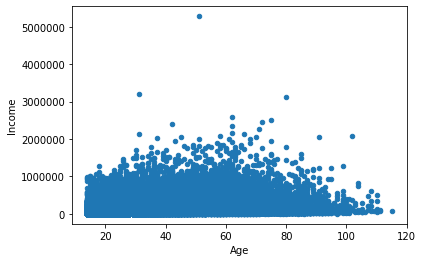

In [73]:
total_data_df[:tp_bound].plot.scatter(x='Age', y = 'Income')

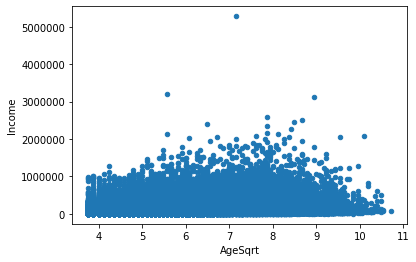

In [74]:
total_data_df['AgeSqrt'] = total_data_df['Age'].map(lambda a: np.sqrt(a))

total_data_df[:111994].plot.scatter(x='AgeSqrt', y = 'Income')



In [75]:
total_data_df['University Degree'].fillna('unknown', inplace=True)
total_data_df['University Degree'] = total_data_df['University Degree'].map(lambda x: 'unknown' if x == '0' else x)
total_data_df['University Degree'].value_counts().sort_index()

Bachelor    71086
Master      44831
No          44697
PhD         11226
unknown     13383
Name: University Degree, dtype: int64

In [76]:
dummies = pd.get_dummies(total_data_df['University Degree'], prefix = 'UD')
total_data_df.drop('University Degree', axis = 1, inplace = True)
total_data_df = total_data_df.join(dummies)

total_data_df.head()

,Year of Record,Age,Profession,Income,Gender_female,Gender_male,Gender_other,Gender_unknown,Country_Afghanistan,Country_Albania,...,Country_Zambia,Country_Zimbabwe,SoC_8e6_1,SoC_8e6_2,AgeSqrt,UD_Bachelor,UD_Master,UD_No,UD_PhD,UD_unknown
Instance,,,,,,,,,,,,,,,,,,,,,
1,47.0,41.0,steel workers,61031.94416,0,0,0,1,0,0,...,0,0,1239930,0,6.403124,1,0,0,0,0
2,46.0,41.0,safe event coordinator,91001.32764,0,0,1,0,0,0,...,0,0,1603504,0,6.403124,0,1,0,0,0
3,68.0,28.0,receivables/payables analyst,157982.17670,0,0,1,0,0,0,...,0,0,1298017,0,5.291503,0,0,0,1,0
4,56.0,33.0,fleet assistant,45993.75793,0,0,1,0,0,0,...,0,0,751903,0,5.744563,0,0,1,0,0
5,60.0,46.0,lead trainer,38022.16217,1,0,0,0,0,0,...,0,0,95389,0,6.782330,0,0,0,0,1


In [77]:
# profession
total_data_df['Pis_manager'] = total_data_df['Profession'].str.find('manager') >= 0
total_data_df['Pis_manager'] = total_data_df['Pis_manager'].map(lambda x: 1 if x else 0)

total_data_df['Pis_senior'] = total_data_df['Profession'].str.find('senior') >= 0
total_data_df['Pis_senior'] = total_data_df['Pis_senior'].map(lambda x: 1 if x else 0)

total_data_df['Pis_admin'] = total_data_df['Profession'].str.find('admin') >= 0
total_data_df['Pis_admin'] = total_data_df['Pis_admin'].map(lambda x: 1 if x else 0)

total_data_df['Pis_worker'] = total_data_df['Profession'].str.find('worker') >= 0
total_data_df['Pis_worker'] = total_data_df['Pis_worker'].map(lambda x: 1 if x else 0)

total_data_df['Pis_operat'] = total_data_df['Profession'].str.find('operat') >= 0
total_data_df['Pis_operat'] = total_data_df['Pis_operat'].map(lambda x: 1 if x else 0)

total_data_df['Pis_public'] = total_data_df['Profession'].str.find('public') >= 0
total_data_df['Pis_public'] = total_data_df['Pis_public'].map(lambda x: 1 if x else 0)

total_data_df['Pis_analyst'] = total_data_df['Profession'].str.find('analyst') >= 0
total_data_df['Pis_analyst'] = total_data_df['Pis_analyst'].map(lambda x: 1 if x else 0)

total_data_df['Pis_specialist'] = total_data_df['Profession'].str.find('specialist') >= 0
total_data_df['Pis_specialist'] = total_data_df['Pis_specialist'].map(lambda x: 1 if x else 0)

total_data_df['Pis_engineer'] = total_data_df['Profession'].str.find('engineer') >= 0
total_data_df['Pis_engineer'] = total_data_df['Pis_engineer'].map(lambda x: 1 if x else 0)

total_data_df['Pis_assistant'] = total_data_df['Profession'].str.find('assistant') >= 0
total_data_df['Pis_assistant'] = total_data_df['Pis_assistant'].map(lambda x: 1 if x else 0)

total_data_df['Pis_technician'] = total_data_df['Profession'].str.find('technician') >= 0
total_data_df['Pis_technician'] = total_data_df['Pis_technician'].map(lambda x: 1 if x else 0)

total_data_df.head()


,Year of Record,Age,Profession,Income,Gender_female,Gender_male,Gender_other,Gender_unknown,Country_Afghanistan,Country_Albania,...,Pis_senior,Pis_admin,Pis_worker,Pis_operat,Pis_public,Pis_analyst,Pis_specialist,Pis_engineer,Pis_assistant,Pis_technician
Instance,,,,,,,,,,,,,,,,,,,,,
1,47.0,41.0,steel workers,61031.94416,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
2,46.0,41.0,safe event coordinator,91001.32764,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68.0,28.0,receivables/payables analyst,157982.17670,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,56.0,33.0,fleet assistant,45993.75793,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,60.0,46.0,lead trainer,38022.16217,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
total_data_df.drop('Profession', axis = 1, inplace = True)


In [79]:
total_data_df[total_data_df['Income'] > 3000000]

,Year of Record,Age,Income,Gender_female,Gender_male,Gender_other,Gender_unknown,Country_Afghanistan,Country_Albania,Country_Algeria,...,Pis_senior,Pis_admin,Pis_worker,Pis_operat,Pis_public,Pis_analyst,Pis_specialist,Pis_engineer,Pis_assistant,Pis_technician
Instance,,,,,,,,,,,,,,,,,,,,,
60080,57.0,80.0,3126311.634,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
78094,69.0,51.0,5285252.357,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
108763,66.0,31.0,3213681.751,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
total_data_df.loc[60080, 'Income'] = 3000000
total_data_df.loc[78094, 'Income'] = 3000000
total_data_df.loc[108763, 'Income'] = 3000000

In [116]:
# training

total = total_data_df.drop('Income', axis = 1, inplace = False)
X = total[: 111993]
y = training_data_df['Income']

linreg1 = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=None)

linreg1.fit(X_train, y_train)
linreg1.score(X_test, y_test)

0.7069569503858624

In [117]:
x = total[111993: ]
y = linreg1.predict(x)

In [118]:
income_series = pd.Series(y, name = 'Income')
instance_series = pd.Series(np.arange(111994, 111994 + 73229 + 1), name = 'Instance')
result = pd.concat([instance_series, income_series], axis = 1)
result.to_csv('result-2.csv', index = False)